# Importing libraries

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

import seaborn as sns; sns.set()
import sklearn
import warnings
warnings.filterwarnings("ignore")

# AIM: Calculating life expectancies of developing and developed

Now that you know that your aim is to predict the life expectancies by grouping the countires by the above groups.
You began by reading the file

# Reading file

In [2]:
df=pd.read_csv('LifeExpectancyData.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


`Interpretation`: We see that the data has been loaded properly

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None) 
df.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B',
       'Measles', 'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIVAIDS','GDP', 'Population', 'Thinness 10-19',
       'Thinness 5-9', 'Income Composition', 'Schooling']

df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


`Interpretation`: The required columns have been set

# Describing and cleaning data

In [5]:
df.shape

(2938, 22)

`Interpretation`: The given dataframe has 2938 rows and 22 columns.

In [6]:
df.isnull().sum(axis=0)

Country                  0
Year                     0
Status                   0
Life Expectancy         10
Adult Mortality         10
Infant Deaths            0
Alcohol                194
Percent Expenditure      0
Hep B                  553
Measles                  0
BMI                     34
U-5 Deaths               0
Polio                   19
Total Expenditure      226
Diphtheria              19
HIVAIDS                  0
GDP                    448
Population             652
Thinness 10-19          34
Thinness 5-9            34
Income Composition     167
Schooling              163
dtype: int64

`Interpretation`: We see that there are a lot of empty fields. Now we need to cleanse this data to ensure that there is no empty field.

## Visualising missing data

AxesSubplot(0.125,0.125;0.698618x0.755)


,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


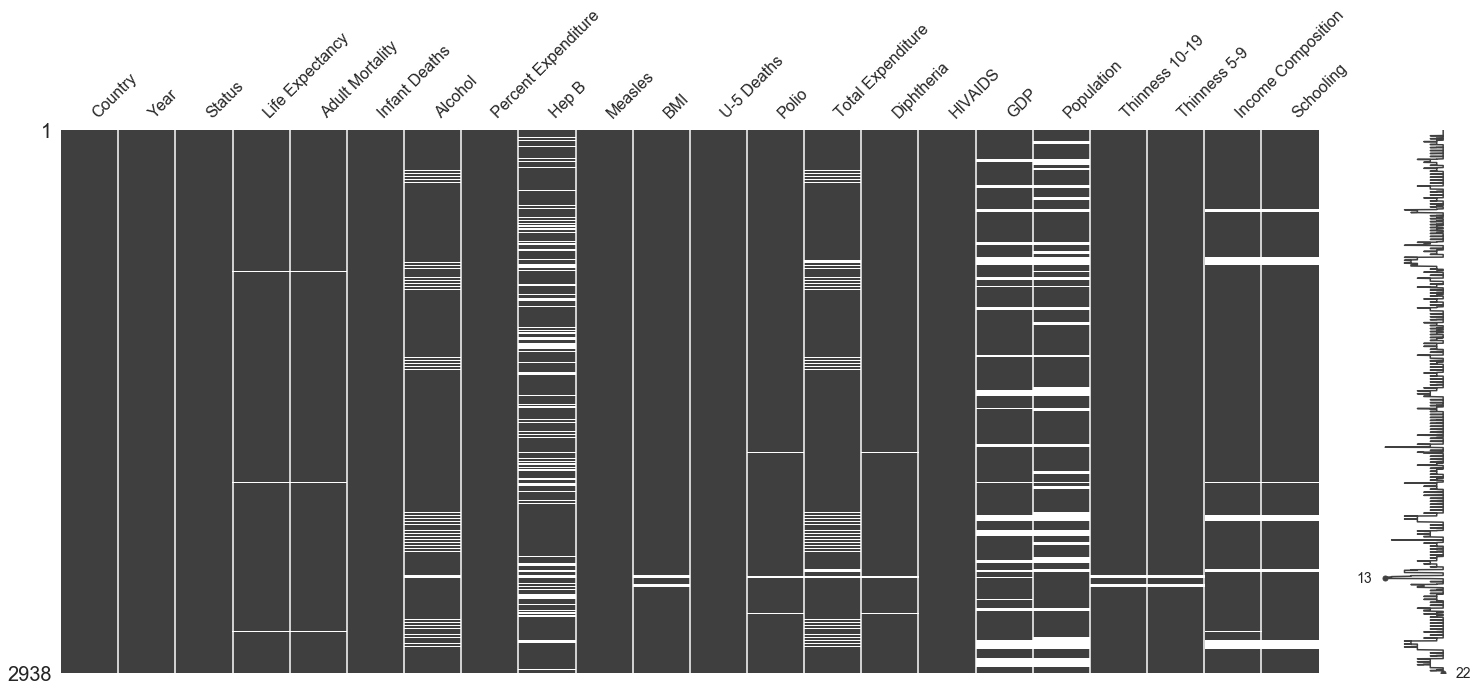

In [7]:
import missingno as msno
print(msno.matrix(df))
df.describe()

`Interpretation`: We see that this way is easier to visualise missing data

(2938, 22)
AxesSubplot(0.125,0.125;0.698618x0.755)


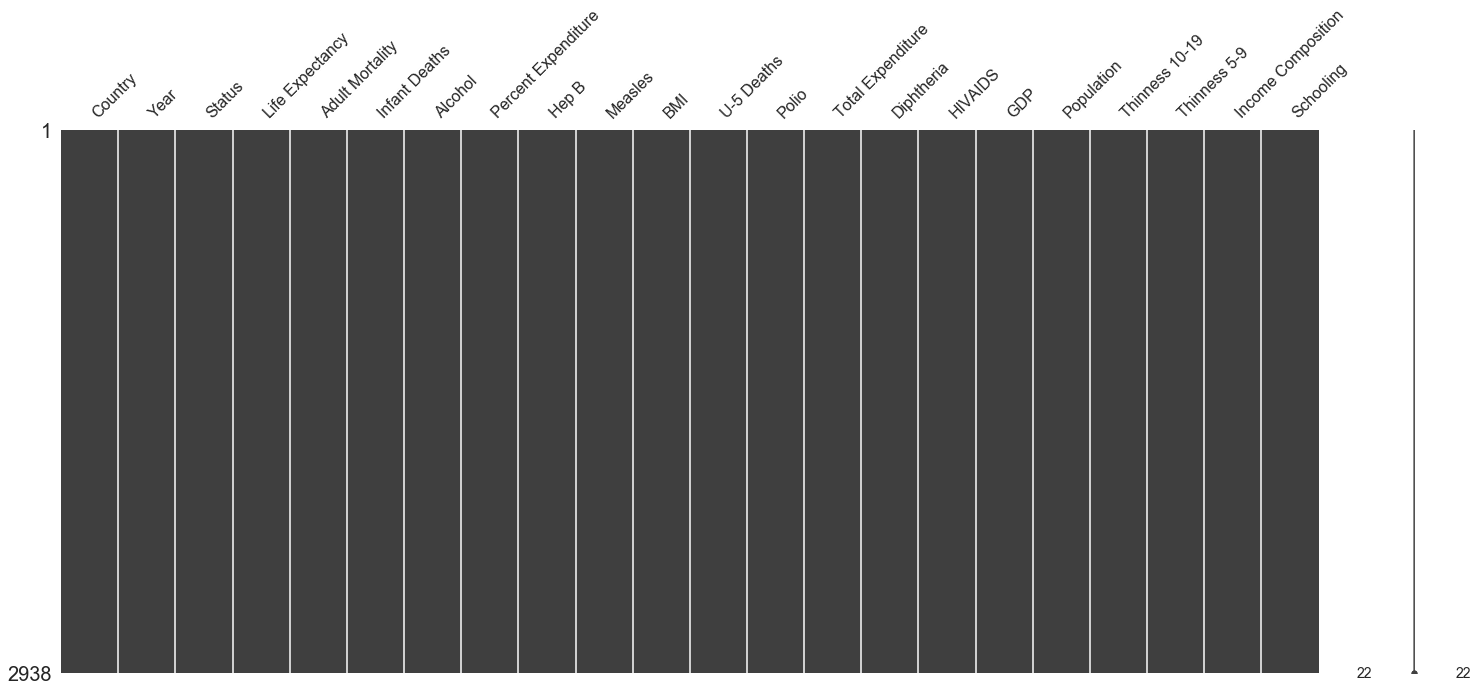

In [8]:


#Replace Missing Values Associated with Country Feature Mean
for column in df.columns:
    for i in range(len(df)): 
        country=df['Country'][i]
        status=df['Country'][i]
        if (df[column].isnull()[i]==True):
            df[column][i]=df[df['Country']==country][column].mean() 
        else:
             pass
#Fill Unresolved Values by Status
df1=df[(df['Status']=='Developed')].fillna(df[(df['Status']=='Developed')].mean())
df2=df[(df['Status']=='Developing')].fillna(df[(df['Status']=='Developing')].mean())
df=df2.append(df1)
print(df.shape)
print(msno.matrix(df))



`Interpretation`: All the missing data has been cleaned, and there is no NULL/NAN values in any columm now.

In [9]:
# deleting the null values
before_drop = df.shape[0]
df = df.dropna()
after_drop = df.shape[0]

In [10]:
df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
#Canada and France are mislabeled as Developing
df[df['Country']=='France']['Status'].replace('Developing','Developed')
df[df['Country']=='Canada']['Status'].replace('Developing','Developed')

496    Developed
497    Developed
498    Developed
499    Developed
500    Developed
501    Developed
502    Developed
503    Developed
504    Developed
505    Developed
506    Developed
507    Developed
508    Developed
509    Developed
510    Developed
511    Developed
Name: Status, dtype: object

`Interpretation`: France and Canada have been labelled as developed

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2809
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2938 non-null   object 
 1   Year                 2938 non-null   int64  
 2   Status               2938 non-null   object 
 3   Life Expectancy      2938 non-null   float64
 4   Adult Mortality      2938 non-null   float64
 5   Infant Deaths        2938 non-null   int64  
 6   Alcohol              2938 non-null   float64
 7   Percent Expenditure  2938 non-null   float64
 8   Hep B                2938 non-null   float64
 9   Measles              2938 non-null   int64  
 10  BMI                  2938 non-null   float64
 11  U-5 Deaths           2938 non-null   int64  
 12  Polio                2938 non-null   float64
 13  Total Expenditure    2938 non-null   float64
 14  Diphtheria           2938 non-null   float64
 15  HIVAIDS              2938 non-null   f

`Interpretation`:  We see that we have various types of data in our dataset, ranging from object to float type

# EDA - Exploratory Data Analysis

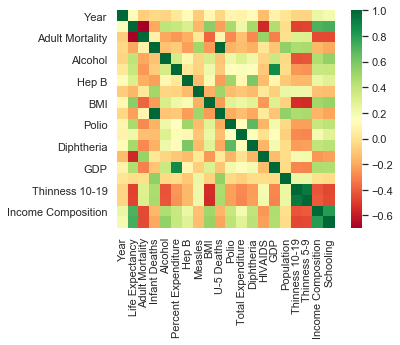

In [13]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [14]:
df.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.217738,164.857839,30.303948,4.594394,738.251295,78.970357,2419.592240,38.287849,42.035739,82.396266,5.917162,82.183944,1.742103,7332.101801,1.278805e+07,4.848421,4.879169,0.629394,12.025459
std,4.613841,9.508437,124.084750,117.926501,4.028168,1987.914858,24.607214,11467.272489,19.930067,160.445548,23.476067,2.456024,23.743205,5.077785,13378.961185,5.383046e+07,4.395274,4.483454,0.207021,3.304714
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,0.930000,4.685343,73.500000,0.000000,19.400000,0.000000,78.000000,4.280000,78.000000,0.100000,562.082880,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,2834.764218,3.625718e+06,3.400000,3.400000,0.672000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,5433.356450,1.404546e+07,7.100000,7.200000,0.780000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Life Expectancy and QQ plots

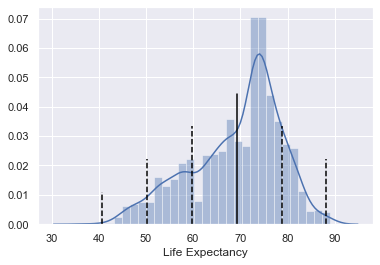

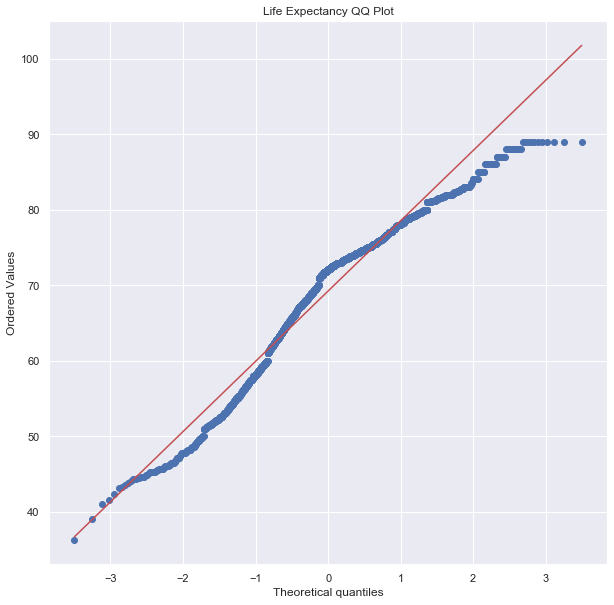

(0.9566084742546082, 9.622531605232346e-29)


In [15]:
#Life Expectancy 
sns.distplot(df['Life Expectancy'])
plt.axvline(df['Life Expectancy'].mean(),0,.6,color='black')
plt.axvline(df['Life Expectancy'].mean()+df['Life Expectancy'].std(),0,.45,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-df['Life Expectancy'].std(),0,.45,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()+2*df['Life Expectancy'].std(),0,.30,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-2*df['Life Expectancy'].std(),0,.30,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-3*df['Life Expectancy'].std(),0,.15,color='black',linestyle='--')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(df['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy QQ Plot')
plt.show()
print(stats.shapiro(df['Life Expectancy']))

`Interpretation`: The maximum value 89.0 is about 2.08 standard deviations away from the mean 69.2 while the minimum 36.3 is about 3.46 deviations away. The standard deviation for the whole sample is 9.50 years.Shapiro Wilk's p-value is more valid with over 5000 data points, but using the QQ plot and the Wilk statistic is trending close to normality.







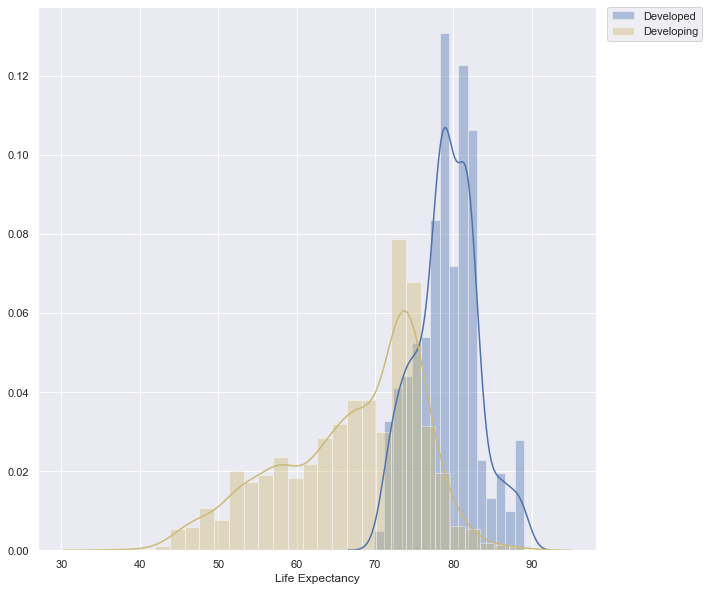

(0.9566084742546082, 9.622531605232346e-29)


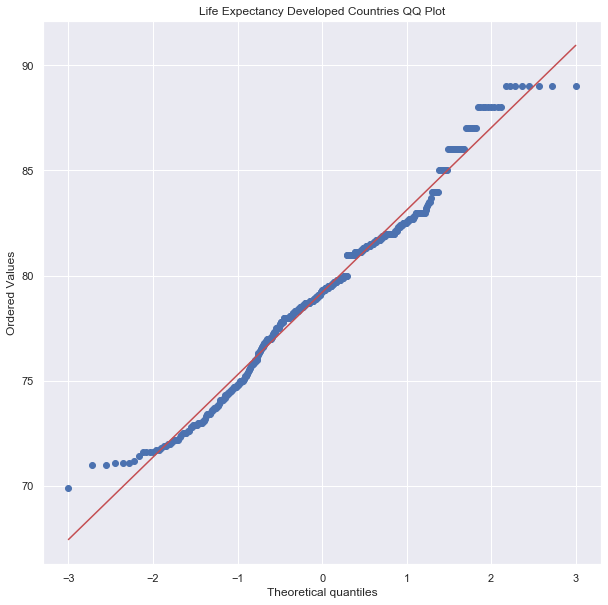

(0.9566084742546082, 9.622531605232346e-29)


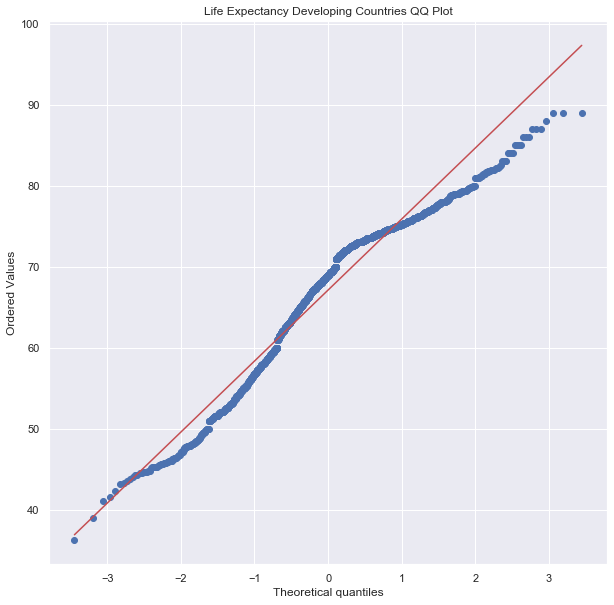

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Developed,512.0,79.197852,3.930942,69.9,76.8,79.25,81.7,89.0
Developing,2426.0,67.111465,8.987504,36.3,61.1,69.00,74.0,89.0


In [16]:
#Life Expectancy 
sns.distplot(df[df['Status']=='Developed']['Life Expectancy'])
sns.distplot(df[df['Status']=='Developing']['Life Expectancy'],color='y')
labels=['Developed','Developing']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(df[df['Status']=='Developed']['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy Developed Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()
#QQ plot   
stats.probplot(df[df['Status']=='Developing']['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy Developing Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()

df['Life Expectancy'].groupby(df['Status']).describe()

`Interpretation`: The table and QQ plots show the statistics for the developing and developed countries. We could have used them together as a whole but that would lead to a lot of deviation since the average life expectancy for developed and develpoing countries is very different (A lor of factors contribute to the life expectancy)

# Life Expectancy Factor Plot


Defining the **LEfactorplot** functionm which takes in a column as an argument.

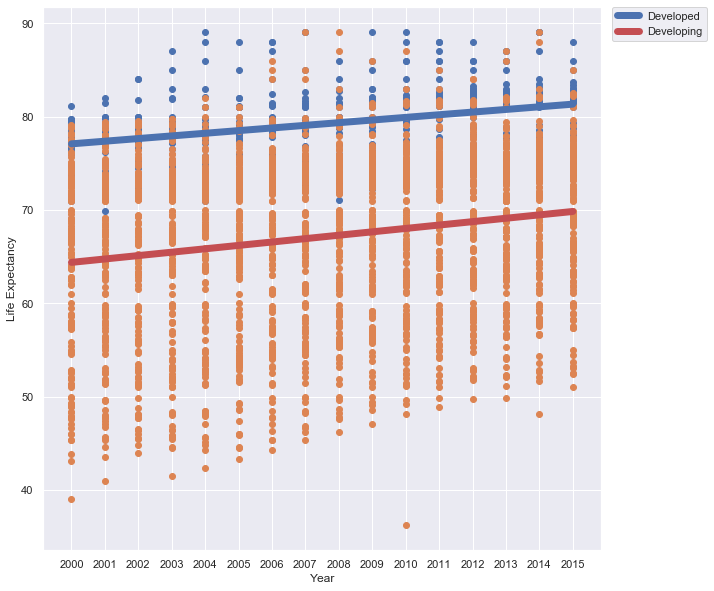

In [17]:
def LEfactorplot(column):
    x=df[df['Status']=='Developed'][column]
    y=df[df['Status']=='Developed']['Life Expectancy']
    x1=df[df['Status']=='Developing'][column]
    y1=df[df['Status']=='Developing']['Life Expectancy']
    #Fit Lines
    z1 =np.polyfit(x,y,1)
    z2 =np.polyfit(x1,y1,1)
    z1poly = np.poly1d(z1) 
    z2poly = np.poly1d(z2)

    #Plot
    plt.scatter(x,y,alpha=1)
    plt.scatter(x1,y1,alpha=1)
    plt.plot(x,z1poly(x),linewidth=7.0)
    plt.plot(x1,z2poly(x1),linewidth=7.0,color='r')
    labels=['Developed','Developing']
    plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Life Expectancy')
    plt.xlabel(column)
LEfactorplot('Year')
plt.xticks(np.arange(2000,2016,1))
plt.show()

`Interpretation`: We see the difference in life expectancies of developing and developed countries through the LE factor plot we have made

Correlation Values for the 193 countries left after Data Cleaning:


Life Expectancy  BMI                    0.560105
                 Diphtheria             0.483574
                 Polio                  0.470396
                 GDP                    0.455359
                 Alcohol                0.407103
                 Percent Expenditure    0.381990
                 Hep B                  0.314744
Year             Income Composition     0.233164
Life Expectancy  Total Expenditure      0.226319
Year             Schooling              0.200663
Life Expectancy  Year                   0.168709
                 Population            -0.022831
                 Measles               -0.157401
                 Infant Deaths         -0.196324
                 U-5 Deaths            -0.222286
                 HIVAIDS               -0.556165
                 Adult Mortality       -0.696386
dtype: float64

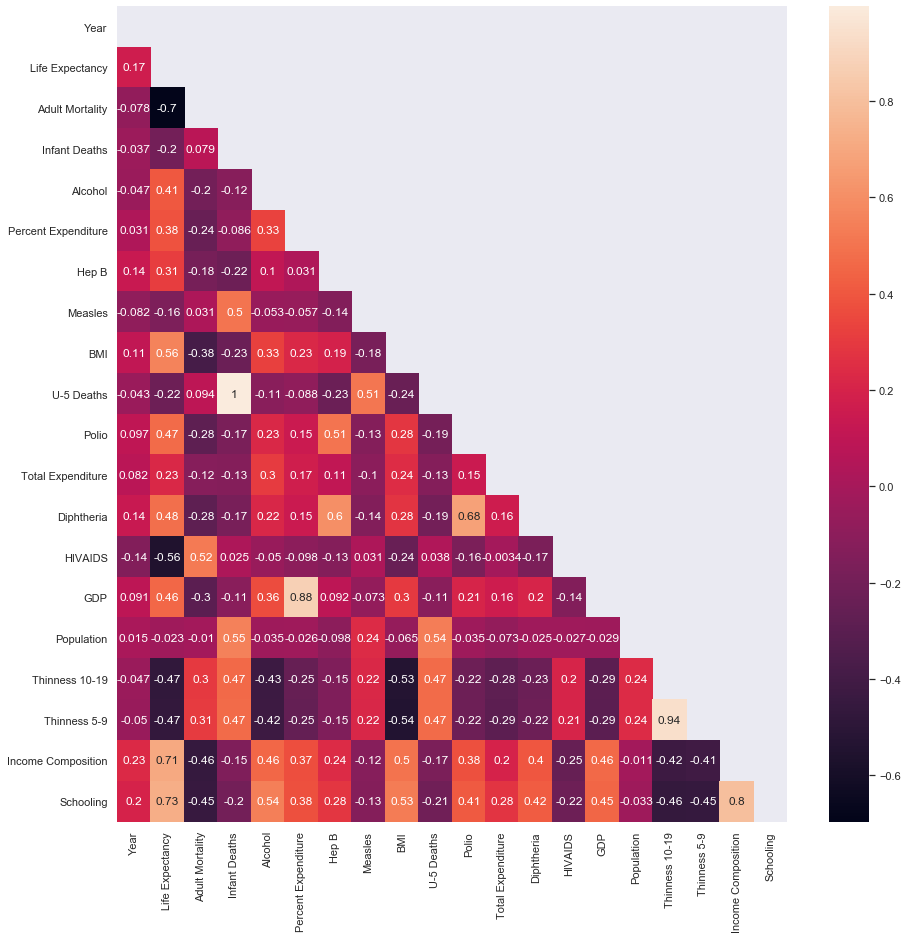

In [18]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,mask=mask)
sol = (corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
                 .stack().sort_values(kind="quicksort",ascending=False))
LE=pd.Series(corrmat.unstack()[18:36]).sort_values(kind="quicksort",ascending=False)
print('Correlation Values for the {} countries left after Data Cleaning:'.format(len(df['Country'].unique())))
LE[1:18]

`Interpretation`: The Feature correlation has been observed and plotted

In [19]:
print('Top 10 Correlated Features Pairs:')
print(sol[0:10],'\n')
print('Bottom 10 Correlated Features Pairs:')
print(sol[143:153])

Top 10 Correlated Features Pairs:
Infant Deaths        U-5 Deaths            0.996629
Thinness 10-19       Thinness 5-9          0.939122
Percent Expenditure  GDP                   0.876259
Income Composition   Schooling             0.801269
Life Expectancy      Schooling             0.732084
                     Income Composition    0.708651
Polio                Diphtheria            0.676641
Hep B                Diphtheria            0.600456
Life Expectancy      BMI                   0.560105
Infant Deaths        Population            0.548775
dtype: float64 

Bottom 10 Correlated Features Pairs:
Infant Deaths    Polio           -0.169586
                 Diphtheria      -0.174236
Measles          BMI             -0.175786
Adult Mortality  Hep B           -0.184961
U-5 Deaths       Polio           -0.187721
                 Diphtheria      -0.194823
Infant Deaths    Schooling       -0.195264
Life Expectancy  Infant Deaths   -0.196324
Adult Mortality  Alcohol         -0.199832
U-5 D

`Interpretation`: We see that some features are very poorly correlated and some are highly correlated

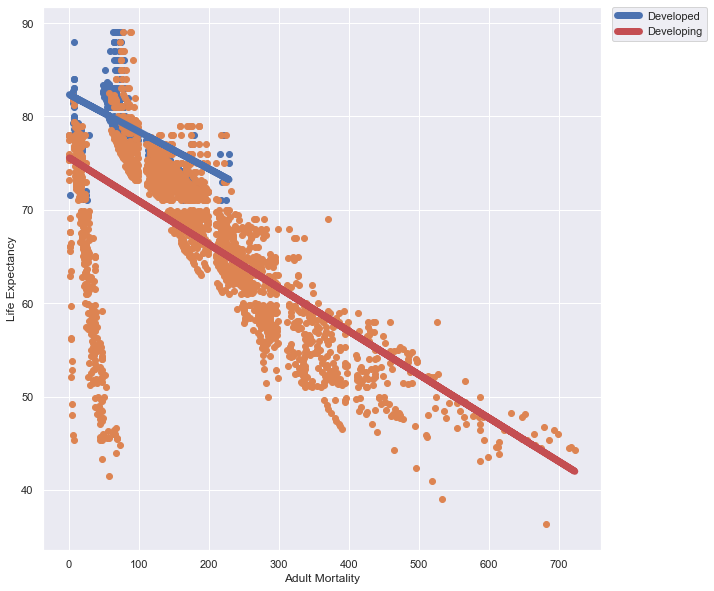

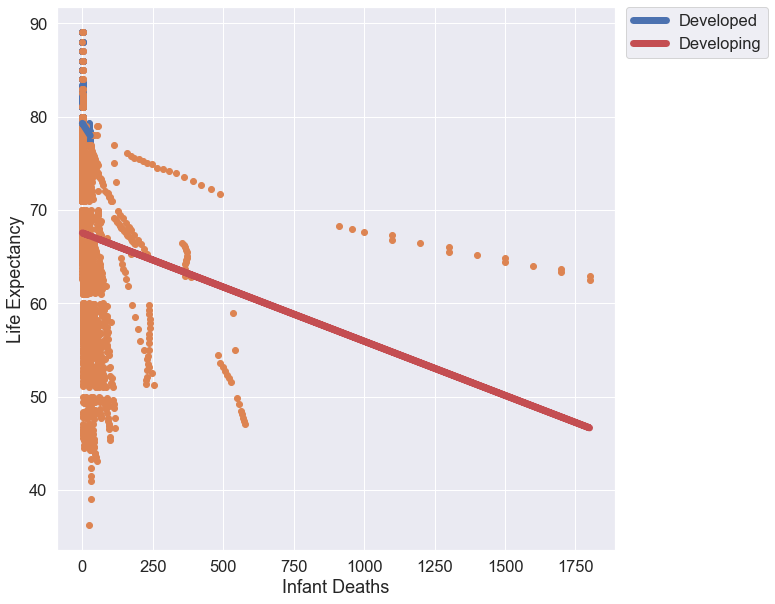

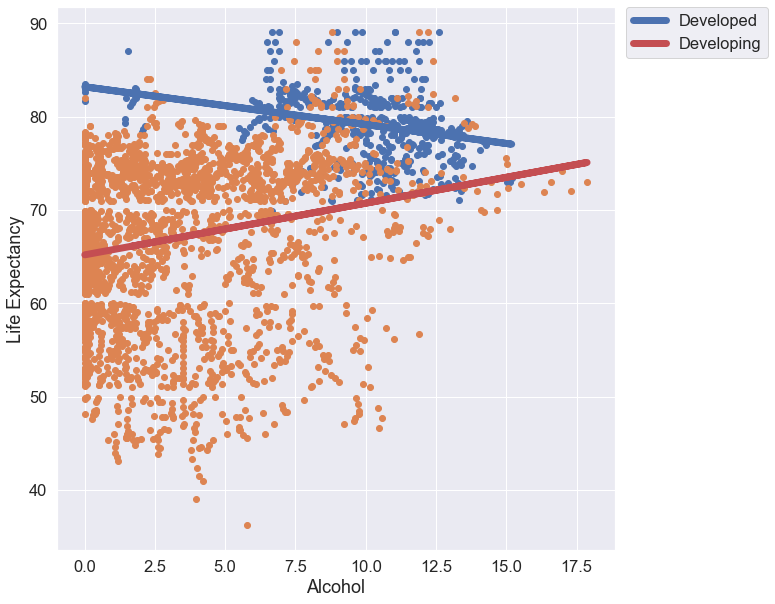

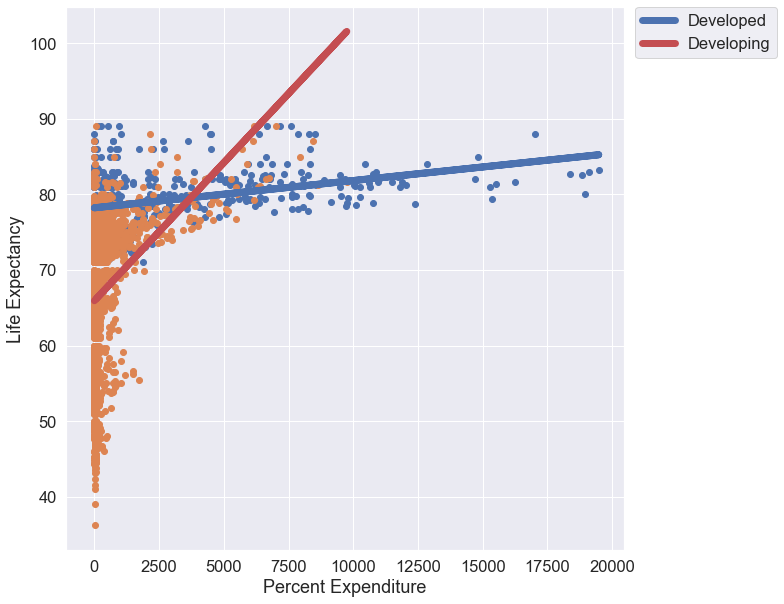

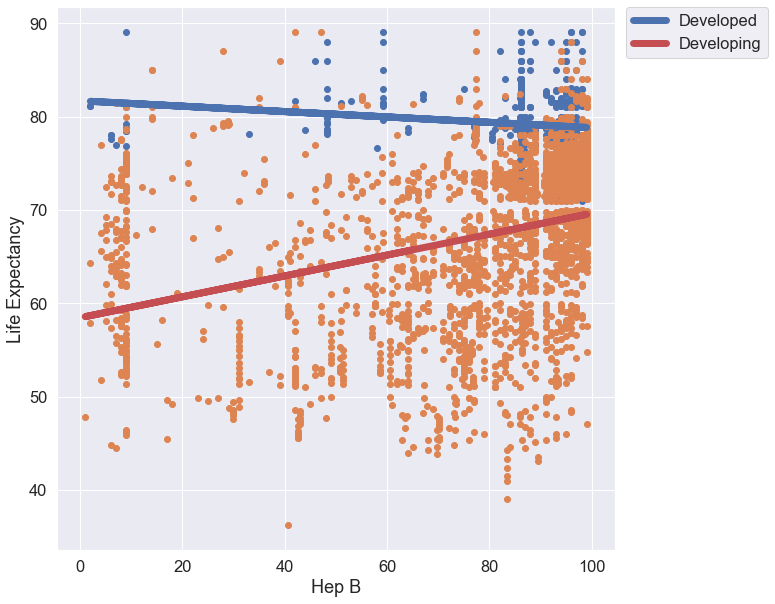

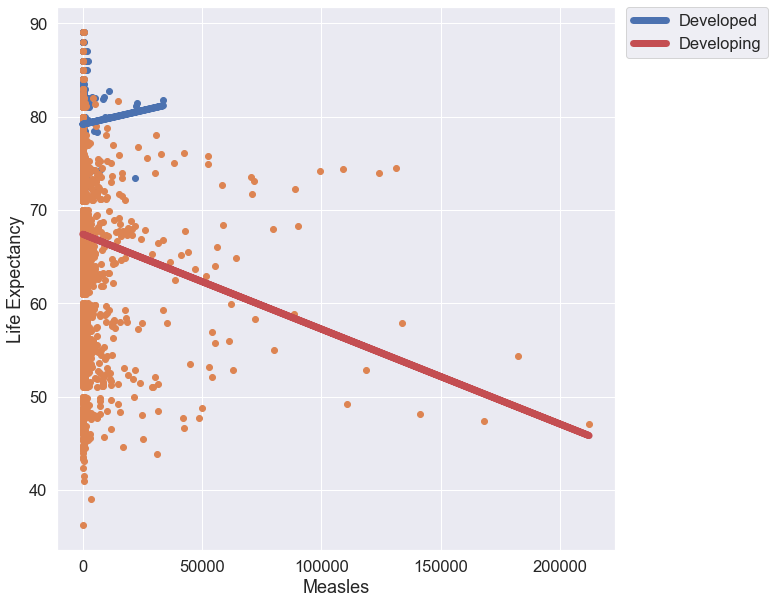

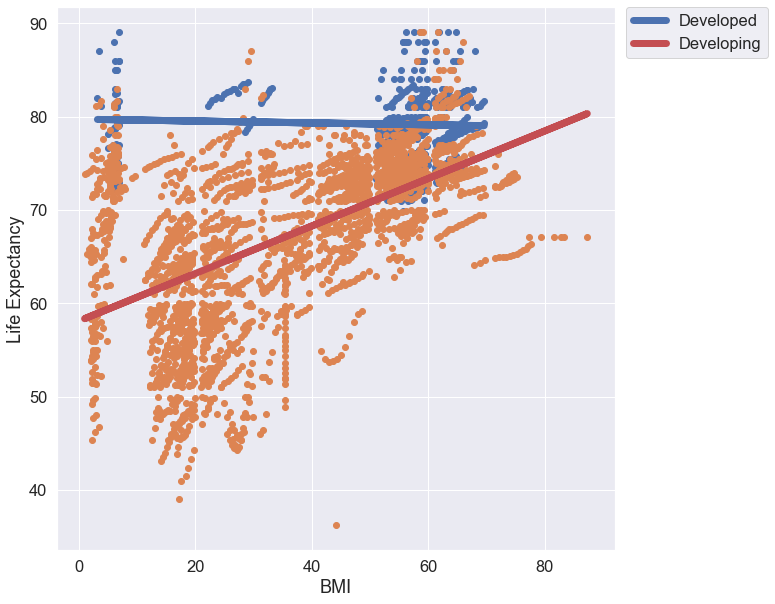

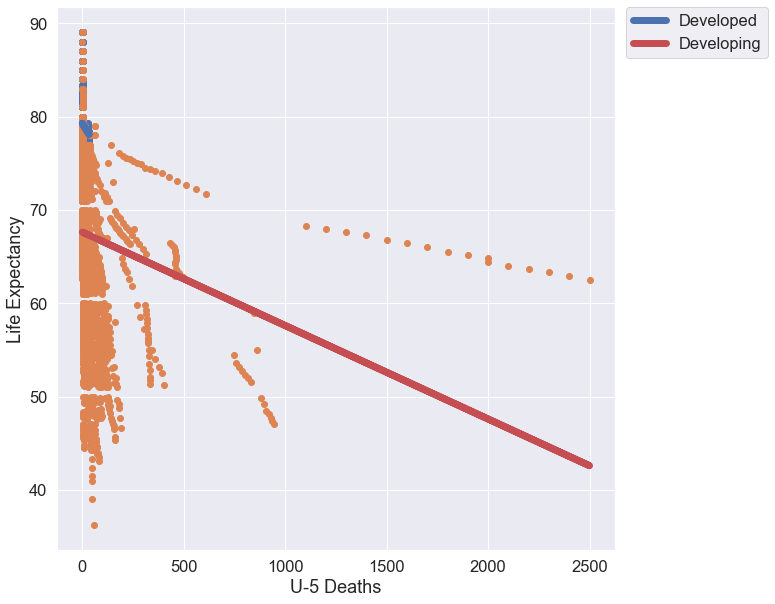

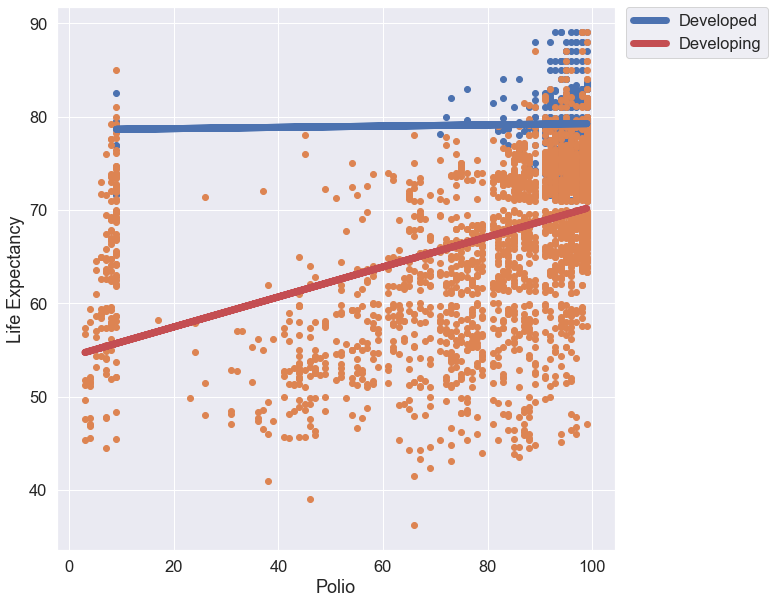

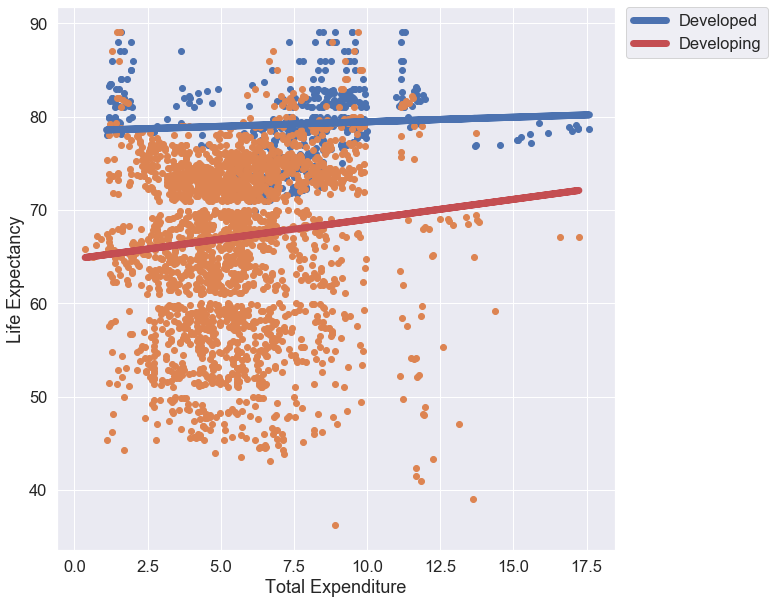

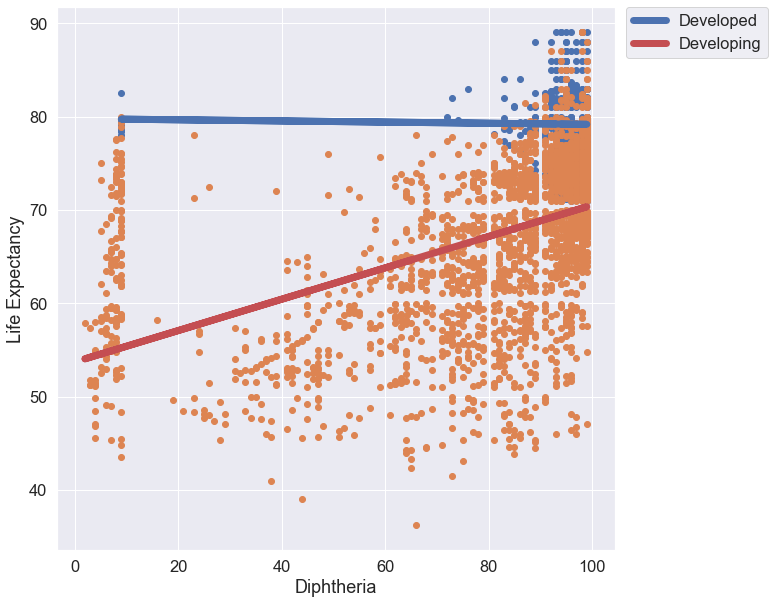

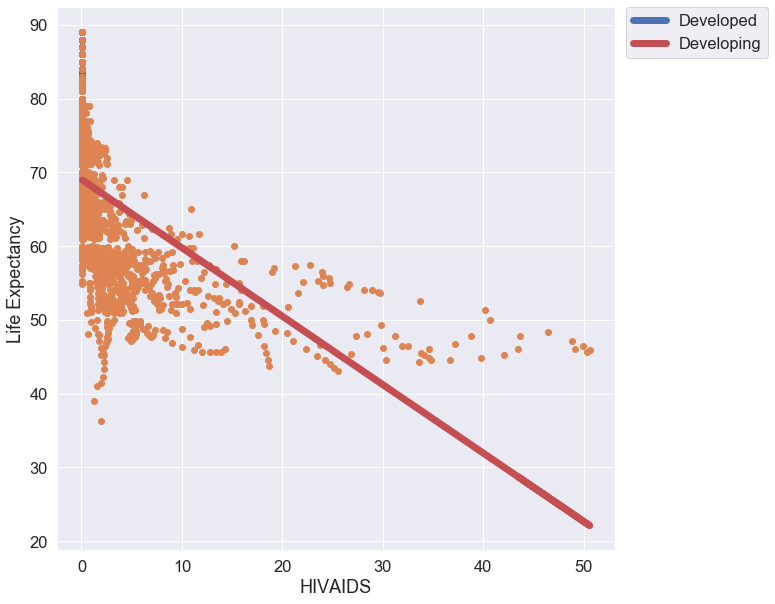

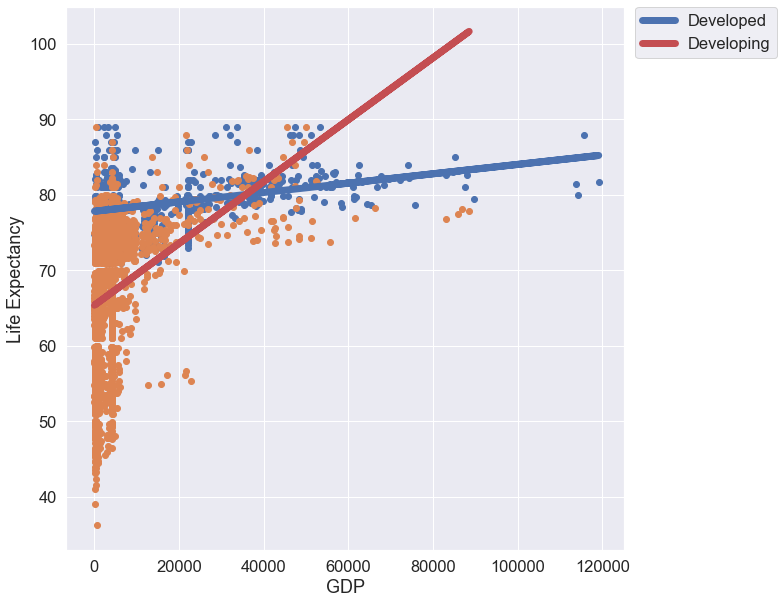

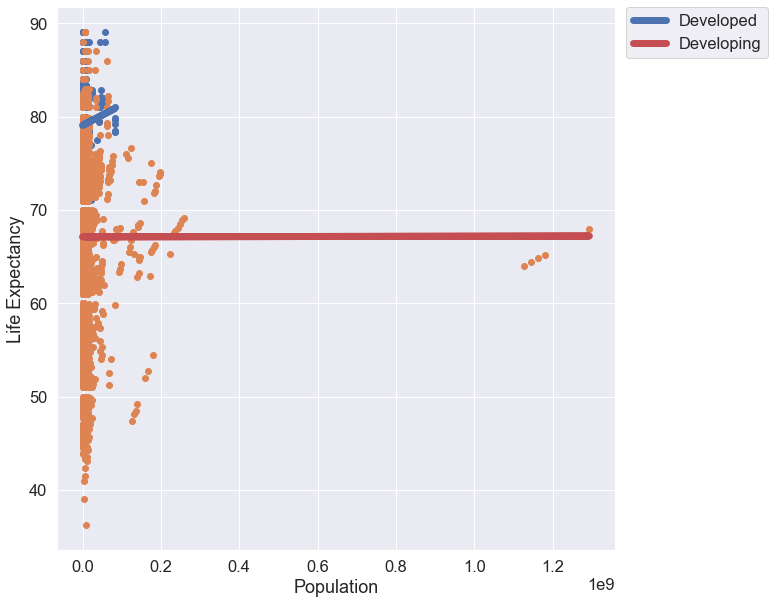

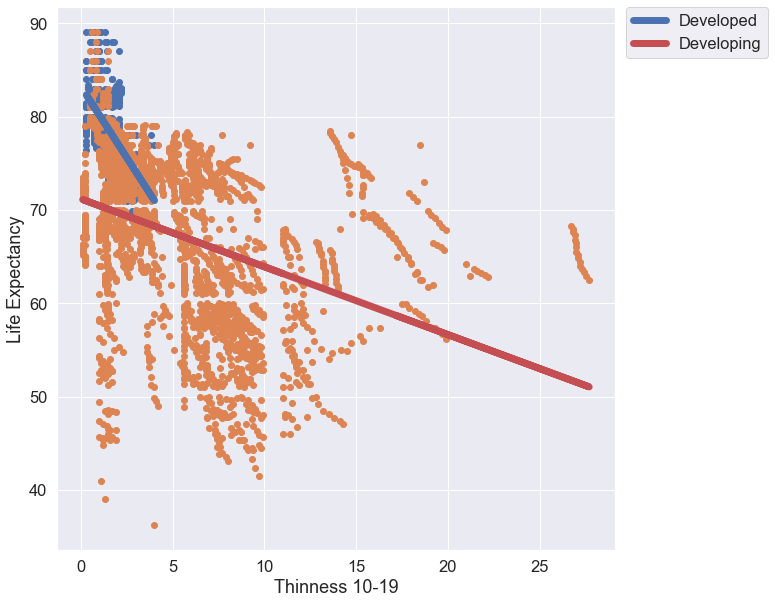

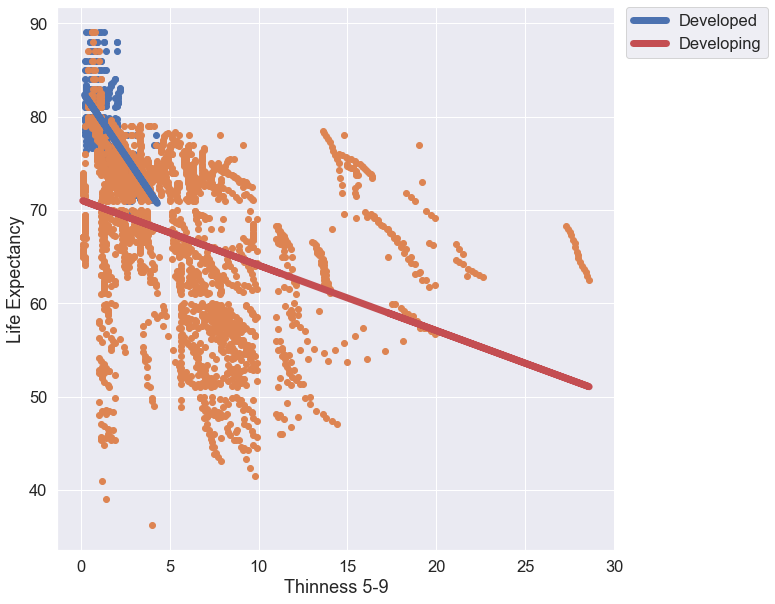

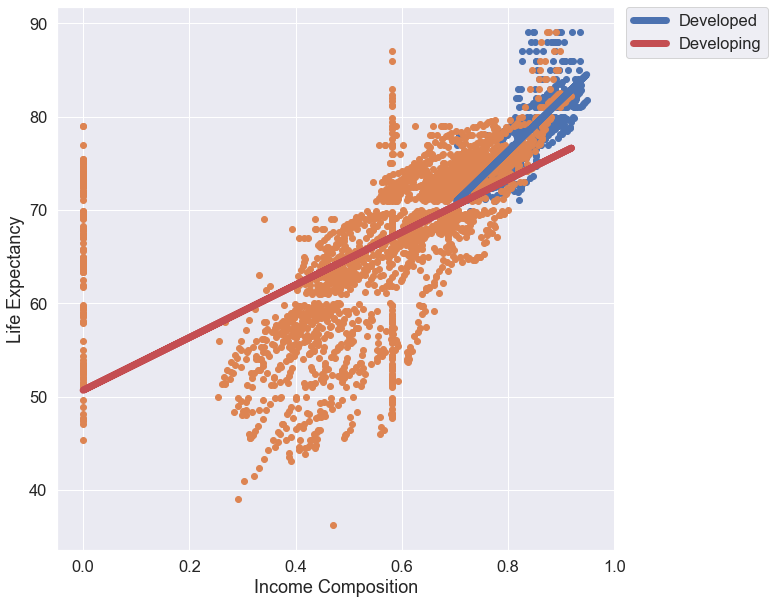

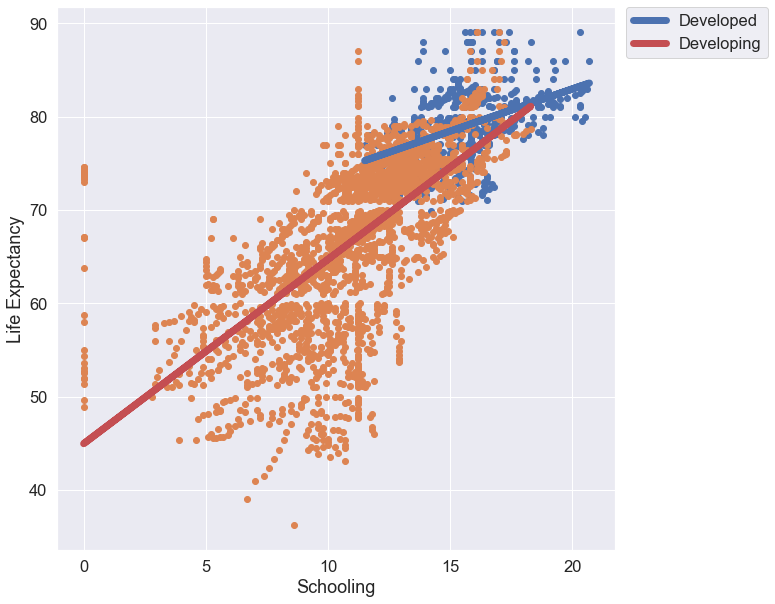

In [20]:
for column in df.columns:
    if (column=='Country')or(column=='Status')or(column=='Life Expectancy')or(column=='world')or(column=='Year'):
        pass
    else:
        LEfactorplot(column)
        sns.set(rc={'figure.figsize':(10,10)})
        sns.set(font_scale=1.5)
        plt.show()

`Interpretation`: The LE curves pertaining to various factors have been plotted

# Regression 

Encoding the country names using Label Encoders, since it would not be manually possible to convert each country name to an integer value.

In [21]:
#Encode Country and Create copy of dataframe for regression 
df_reg=df.copy()
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_reg["country_code"] = lb_make.fit_transform(df_reg["Country"])


#Binarize Status
df_reg['Status']=np.where(df_reg['Status']=='Developing',0,1)

df_reg.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B', 'Measles',
       'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure', 'Diphtheria',
       'HIVAIDS', 'GDP', 'Population', 'Thinness 10-19', 'Thinness 5-9',
       'Income Composition', 'Schooling', 'country_code'],
      dtype='object')

`Interpretation`: All the countries have been encoded and the country status have been binarised to 0 and 1

In [22]:
#remove outliers
for col in df_reg.columns:
    if (col=='world')or (col=='Country'):
        pass
    else:
        df_reg=df_reg[np.abs(df_reg[col]-df_reg[col].mean())<=(3*df_reg[col].std())]

# Parameter 

In [23]:
#Full Training Set
X_train=df_reg[df_reg['Year']<2011].drop('Life Expectancy',axis=1)
Y_train=df_reg[df_reg['Year']<2011]['Life Expectancy']

#Full Testing Set
X_test=df_reg[df_reg['Year']>2011].drop('Life Expectancy',axis=1)
Y_test=df_reg[df_reg['Year']>2011]['Life Expectancy']

#Full Set
X=df_reg.drop('Life Expectancy',axis=1)
Y=df_reg['Life Expectancy']

#Breakdown
Xlist=[X_train,X_test]
Ylist=[Y_train,Y_test]
xlist=['X_train','X_test']
status=['Full Training','Full Testing']

`Interpretation`: The data has been split into training and testing set

In [24]:
df_reg['Life Expectancy'].describe()

count    2063.000000
mean       70.365726
std         8.439897
min        41.000000
25%        65.500000
50%        72.700000
75%        75.800000
max        89.000000
Name: Life Expectancy, dtype: float64

# Linear Regression

Linear Regression X_train
X_train (1350, 18)
R^2 Score:0.8725
RMSE: 3.063
Minimum LE: 42.7
Maximum LE: 83.3
Average Predicted LE: 69.9
LE Standard Deviation: 8.012
LE Variance: 64.189


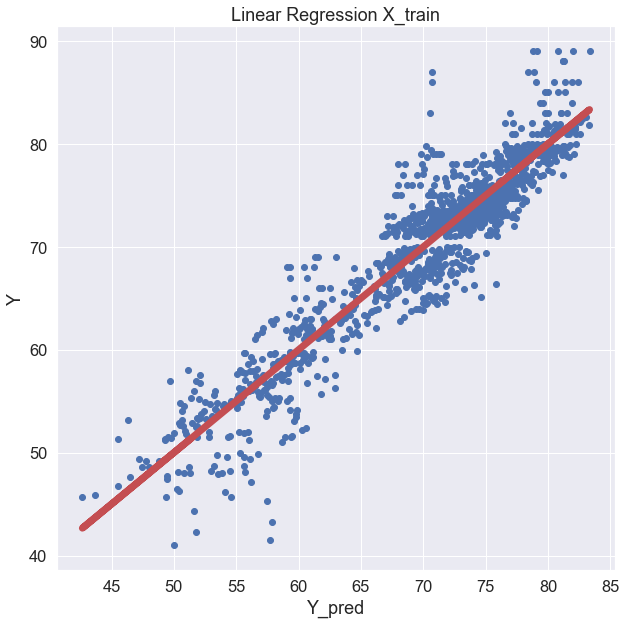

Linear Regression X_test
X_test (575, 18)
R^2 Score:0.8500
RMSE: 3.102
Minimum LE: 49.3
Maximum LE: 85.0
Average Predicted LE: 71.3
LE Standard Deviation: 7.384
LE Variance: 54.516


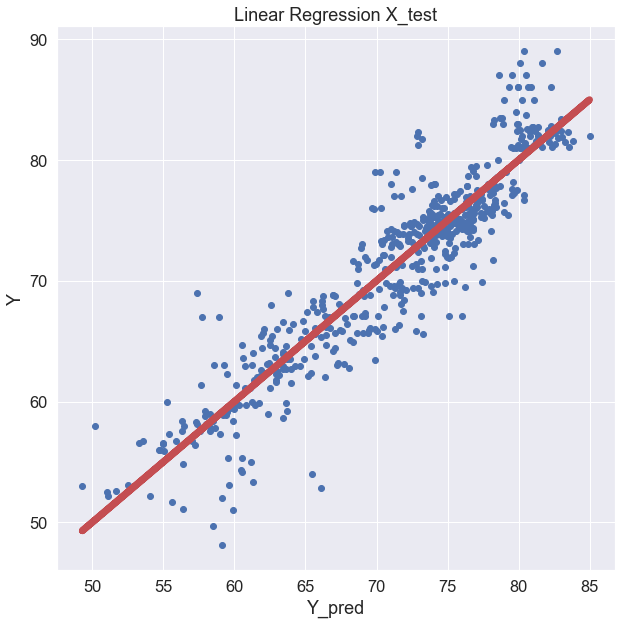

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from pylab import rcParams
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','Status','Infant Deaths','Thinness 10-19'],axis=1)
    x=scale(x)

    print('Linear Regression {}'.format(z))
    print(z,x.shape)
    #Model
    linear = LinearRegression()
    linear.fit(x,y)
        
    #R2 
    R=linear.score(x,y)
    print('R^2 Score:{:0.4f}'.format(R))

    #Predictions
    Y_pred=linear.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1=np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Linear Regression {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    rcParams['figure.figsize'] = 10, 10
    plt.show()
    
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Linear']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Linear',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]
        


`Interpretation`: We see that the Training and Testing accuracies are very similar, hence our model is Fitting properly.

# Theil Sen Regression




The estimation of the model is done by calculating the slopes and intercepts of a subpopulation of all possible combinations of p subsample points. If an intercept is fitted, p must be greater than or equal to n_features + 1. The final slope and intercept is then defined as the spatial median of these slopes and intercepts.


Thiel X_train
X_train (1350, 18)
R^2 Score:0.8652
RMSE: 3.150
Minimum LE: 43.0
Maximum LE: 83.2
Average Predicted LE: 70.0
LE Standard Deviation: 7.880
LE Variance: 62.101


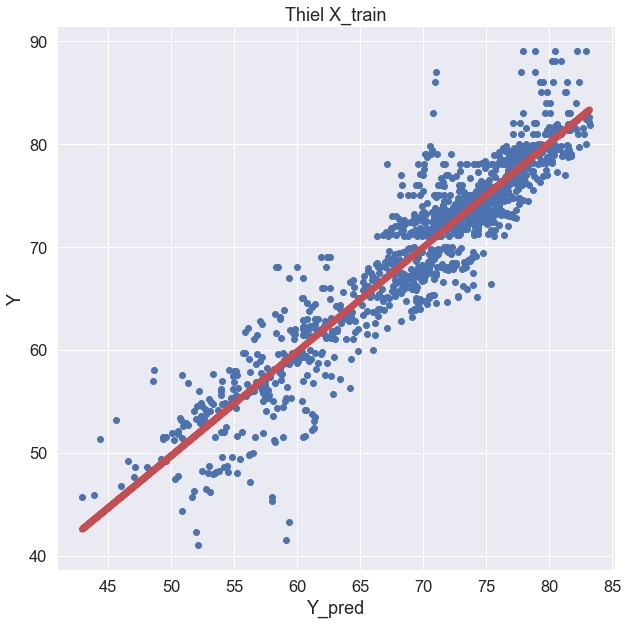

Thiel X_test
X_test (575, 18)
R^2 Score:0.8262
RMSE: 3.338
Minimum LE: 48.0
Maximum LE: 88.1
Average Predicted LE: 71.6
LE Standard Deviation: 7.666
LE Variance: 58.767


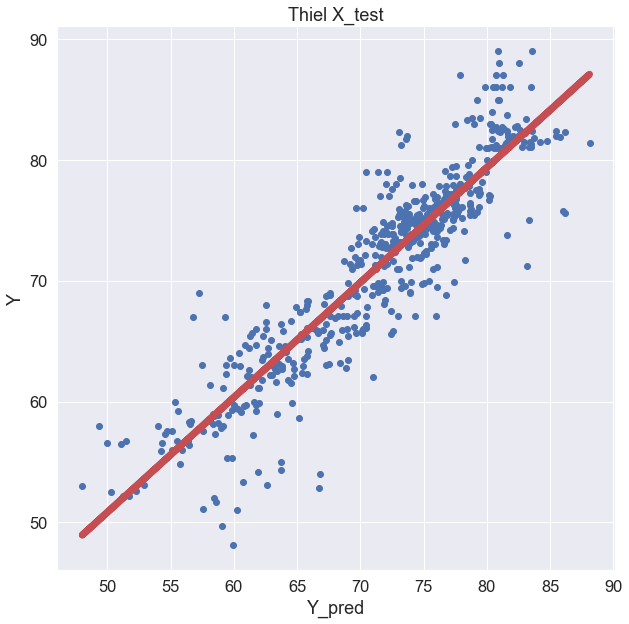

In [27]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.preprocessing import scale
from pylab import rcParams
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','Status','Infant Deaths','Thinness 10-19'],axis=1)
    x=scale(x)

    print('Thiel {}'.format(z))
    print(z,x.shape)
    #Model
    theil = TheilSenRegressor(random_state=52).fit(x,y)
        
    #R2 
    R=theil.score(x,y)
    print('R^2 Score:{:0.4f}'.format(R))

    #Predictions
    Y_pred=theil.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1=np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Thiel {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    rcParams['figure.figsize'] = 10, 10
    plt.show()

    
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Thiel',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]

`Interpretation`: Here as well, the traning and testing accuracies are very similar, so there is no question of overfitting or underfitting

# Ridge



It is widley assumed that Least Square Method finds the Best and Unbiased Coefficients

 We knowthat least square method finds the coefficients that best fit the data. One more condition to be added is that it also finds the unbiased coefficients. Here unbiased means that OLS doesn’t consider which independent variable is more important than others. It simply finds the coefficients for a given data set. In short, there is only one set of betas to be found, resulting in the lowest ‘Residual Sum of Squares (RSS)’. The question then becomes “Is a model with the lowest RSS truly the best model?”.
Bias vs. Variance





In [28]:
from sklearn.model_selection import GridSearchCV

model =linear_model.Ridge()

para = {'alpha':[10,20,40,55,70,90]}
grid = GridSearchCV(model, para, cv = 3)
grid.fit(x, y)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [10, 20, 40, 55, 70, 90]})

In [29]:
grid.best_estimator_

Ridge(alpha=10)

In [30]:
grid.best_score_

0.7956970339436391

In [32]:
grid.best_params_

{'alpha': 10}

`Interpretation`: We have found the best parameters for our Ridge Model

Ridge X_train
X_train (1350, 20)
R^2 Score: 0.8741
RMSE: 3.043
Minimum LE: 42.8
Maximum LE: 83.5
Average Predicted LE: 69.9
LE Standard Deviation: 7.981
LE Variance: 63.693


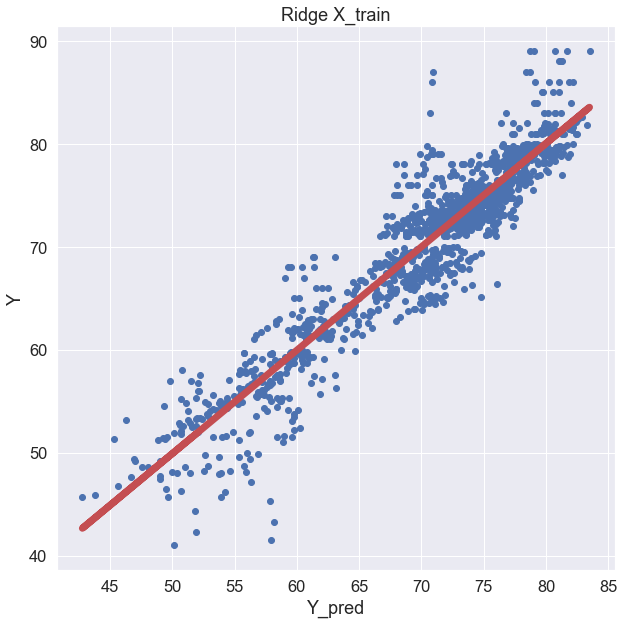

Ridge X_test
X_test (575, 20)
R^2 Score: 0.8505
RMSE: 3.096
Minimum LE: 49.3
Maximum LE: 85.1
Average Predicted LE: 71.3
LE Standard Deviation: 7.323
LE Variance: 53.629


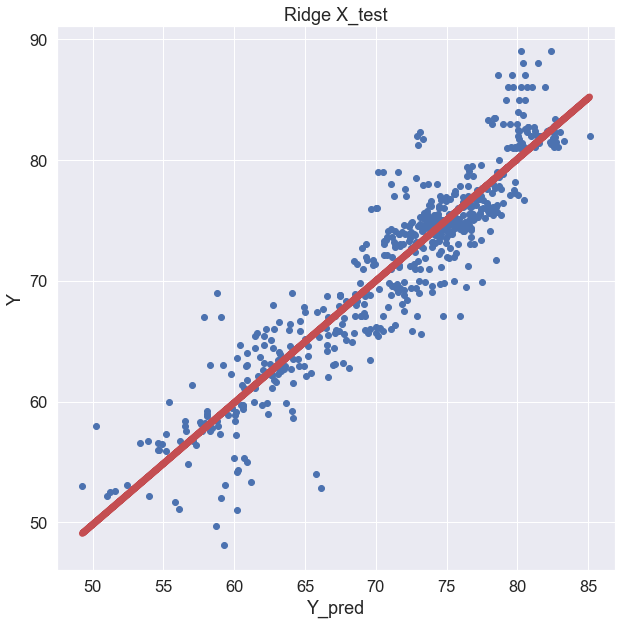

In [33]:
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','Status'],axis=1)
    x=scale(x)
    print('Ridge {}'.format(z))
    print(z,x.shape)
    #Model
    ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=True,solver='auto',random_state=65)
    ridge= ridgeregr.fit(x,y)

    #R2 
    R=ridge.score(x,y)
    print('R^2 Score: {:0.4f}'.format(R))

    #Predictions
    Y_pred=ridge.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
    
    #plot
    z1 =np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Ridge {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    plt.show()
    
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Ridge',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]
    
          

# Lasso





**What is Lasso Regression?**


Ridge and Lasso regression uses two different penalty functions. Ridge uses l2 where as lasso go with l1. In ridge regression, the penalty is the sum of the squares of the coefficients and for the Lasso, it’s the sum of the absolute values of the coefficients. It’s a shrinkage towards zero using an absolute value (l1 penalty) rather than a sum of squares(l2 penalty).

As we know that ridge regression can’t zero coefficients. Here, you either select all the coefficients or none of them whereas LASSO does both parameter shrinkage and variable selection automatically because it zero out the co-efficients of collinear variables. Here it helps to select the variable(s) out of given n variables while performing lasso regression.

Another type of regularization method is ElasticNet, it is hybrid of lasso and ridge regression both. It is trained with L1 and L2 prior as regularizer. A practical advantage of trading-off between Lasso and Ridge is that, it allows Elastic-Net to inherit some of Ridge’s stability under rotation.


The same procedure as Ridge is followed for Lasso regularisation as well.

In [34]:
from sklearn.model_selection import GridSearchCV

model =linear_model.Lasso()

para = {'alpha':[0.01,0.015,0.02,0.025]}
grid = GridSearchCV(model, para, cv = 3)
grid.fit(x, y)



GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.015, 0.02, 0.025]})

In [35]:
grid.best_estimator_



Lasso(alpha=0.025)

In [36]:
grid.best_score_



0.8265519193275574

In [37]:
grid.best_params_

{'alpha': 0.025}

`Interpretation`: The best parameters have been found and they will be used in the function

Lasso X_train
X_train (1350, 20)
R^2 Score: 0.8726
RMSE: 3.061
Minimum LE: 42.8
Maximum LE: 83.2
Average Predicted LE: 69.9
LE Standard Deviation: 7.967
LE Variance: 63.467


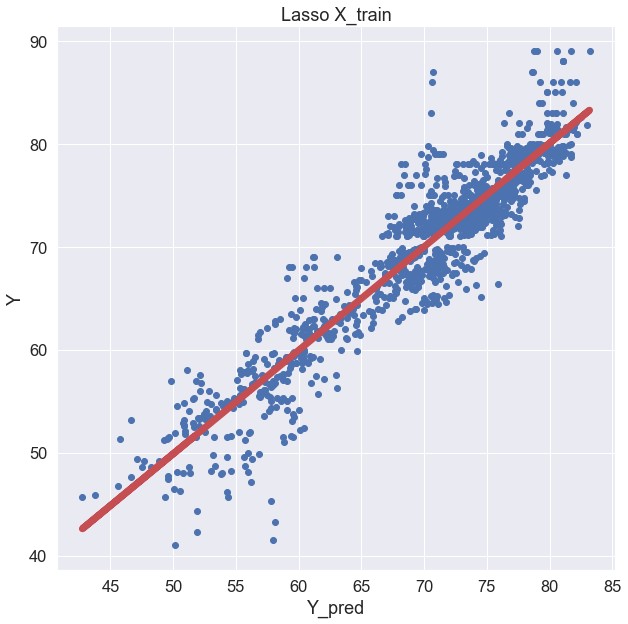

Lasso X_test
X_test (575, 20)
R^2 Score: 0.8505
RMSE: 3.097
Minimum LE: 49.4
Maximum LE: 84.7
Average Predicted LE: 71.3
LE Standard Deviation: 7.343
LE Variance: 53.919


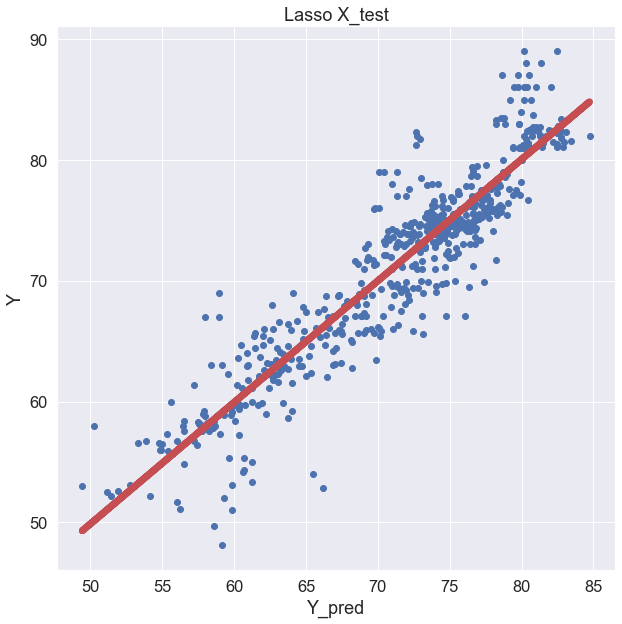

Lasso X
X (2063, 20)
R^2 Score: 0.8652
RMSE: 3.098
Minimum LE: 42.2
Maximum LE: 83.6
Average Predicted LE: 70.4
LE Standard Deviation: 7.806
LE Variance: 60.932


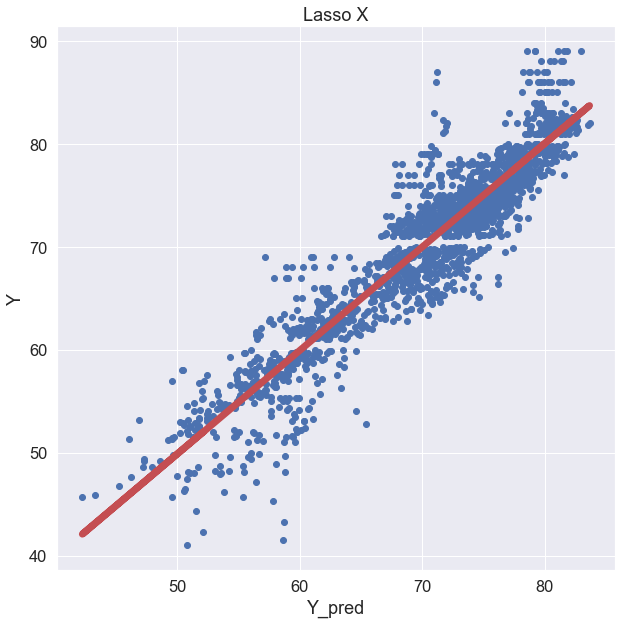

In [39]:

cols=['Year','AdultMortality', 'Infant Deaths','Alcohol', 'PercentExpenditure', 'Hep B', 'Measles', 'BMI', 'U5Deaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIVAIDS', 'Thinness1019',
       'Thinness59', 'IncomeComposition', 'Schooling','country_code']
feature_importances=pd.DataFrame(index=cols)
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x
    y
    x=x.drop(['Country','Status'],axis=1)
    x=scale(x)
    print('Lasso {}'.format(z))
    print(z,x.shape)
#Model
    rf = linear_model.Lasso(alpha=0.025, fit_intercept=True,random_state=65)
    rfc= rf.fit(x,y)

    #R2 
    R=rfc.score(x,y)
    print('R^2 Score: {:0.4f}'.format(R))

    #Predictions
    Y_pred=rf.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1 =np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Lasso {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    plt.show()
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Lasso',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]


`Interpretation`: We see that all the models we have implemented till now are perfectly fitting as the train and test accuracies are in the +-5% range

# Gradient Boosting



## How Gradient Boosting Works

Gradient boosting involves three elements:

    A loss function to be optimized.
    A weak learner to make predictions.
    An additive model to add weak learners to minimize the loss function.



In [40]:
from sklearn.model_selection import GridSearchCV
model = ensemble.GradientBoostingRegressor()
para = {'n_estimators':[50, 100, 150], 'max_depth':[1, 2, 3]}
grid = GridSearchCV(model, para, cv = 3)
grid.fit(x, y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [1, 2, 3],
                         'n_estimators': [50, 100, 150]})

In [41]:
grid.best_estimator_

GradientBoostingRegressor()

In [42]:
grid.best_score_

0.8567962282191064

In [43]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

Gradient Boosting X_train
X_train (1350, 20)
R^2 Score: 0.9677
RMSE: 1.540
Minimum LE: 42.9
Maximum LE: 86.2
Average Predicted LE: 69.9
LE Standard Deviation: 8.291
LE Variance: 68.733


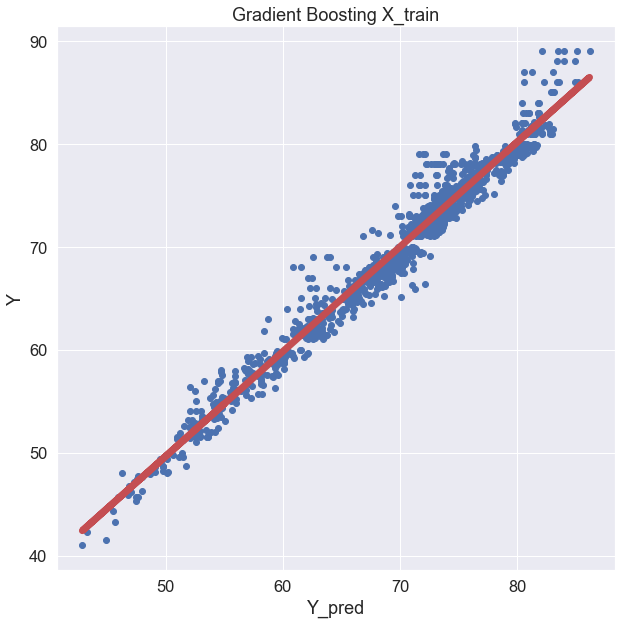

Top 5 Features
 IncomeComposition    55.20
TotalExpenditure     20.39
AdultMortality       13.31
Thinness59            2.43
BMI                   2.10
Name: X_train, dtype: float64 

Gradient Boosting X_test
X_test (575, 20)
R^2 Score: 0.9813
RMSE: 1.094
Minimum LE: 48.8
Maximum LE: 86.5
Average Predicted LE: 71.3
LE Standard Deviation: 7.809
LE Variance: 60.982


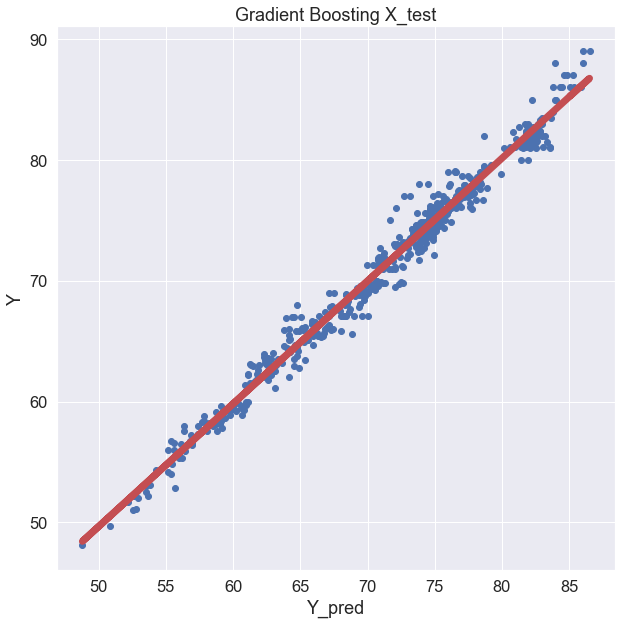

Top 5 Features
 IncomeComposition    38.32
TotalExpenditure     32.82
AdultMortality        9.84
Schooling             8.00
Thinness59            3.14
Name: X_test, dtype: float64 

Gradient Boosting X
X (2063, 20)
R^2 Score: 0.9597
RMSE: 1.693
Minimum LE: 42.1
Maximum LE: 84.6
Average Predicted LE: 70.4
LE Standard Deviation: 8.131
LE Variance: 66.117


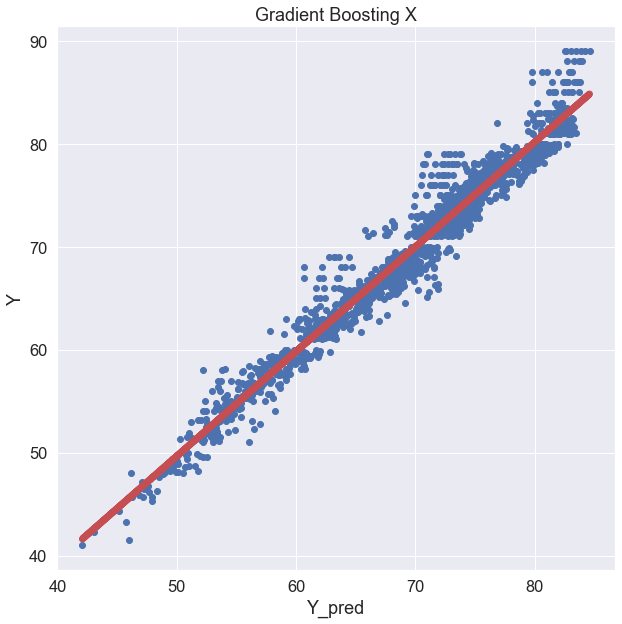

Top 5 Features
 IncomeComposition    57.79
TotalExpenditure     20.02
AdultMortality       11.73
Thinness59            2.50
Measles               1.77
Name: X, dtype: float64 



In [44]:
cols=['Year','AdultMortality', 'Infant Deaths','Alcohol','Population','GDP', 'PercentExpenditure', 'Hep B', 'Measles', 'BMI', 'U5Deaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIVAIDS', 'Thinness1019',
       'Thinness59', 'IncomeComposition', 'Schooling','country_code']
feature_importances=pd.DataFrame(index=cols)
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x
    y
    x=x.drop(['Country','Status'],axis=1)
    x=scale(x)
    print('Gradient Boosting {}'.format(z))
    print(z,x.shape)
    #Model
    params = {'n_estimators':100,'max_depth': 3}
    rf = ensemble.GradientBoostingRegressor(**params)
    rfc= rf.fit(x,y)

    #R2 
    R=rfc.score(x,y)
    print('R^2 Score: {:0.4f}'.format(R))

    #Predictions
    Y_pred=rf.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1 =np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Gradient Boosting {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    plt.show()
    
    #Feature Importance
    feature_importances[z]=(rfc.feature_importances_*100).round(2)
    print('Top 5 Features\n',feature_importances[z].nlargest(5).round(2),'\n')
        
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Gradient Boosting',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]

        


`Interpretation`:  We see that The Gradient Boosting Model gives the best accuracy of more than 95%. Hence this is the best linear model for our Dataset

We now check the feature importance

In [45]:
feature_importances

,X_train,X_test,X
Year,0.05,0.03,0.13
AdultMortality,13.31,9.84,11.73
Infant Deaths,0.43,0.28,0.29
Alcohol,0.66,1.05,0.81
Population,0.28,0.03,0.08
GDP,0.03,0.15,0.01
PercentExpenditure,0.11,0.32,0.10
Hep B,1.19,0.97,0.83
Measles,1.66,0.58,1.77
BMI,2.10,0.51,1.45




Gradient Boosting is the chosen model for regression due its consistent performance and ability to deal with all types and set of data. It captures the LE range,mean, and standard deviation and allows the user to see which features play a key factor in model performance. Given the lower amount of data for this model, it works well and quickly with more data and factors, it is likely to fall off. This is however very promising given the amount of cleaning present at the beginning. 